In [19]:
import numpy as np, pandas as pd
import networkx as nx
from dowhy import gcm

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [97]:
#Treat dataset

#Import data 
# data = pd.read_csv('../datasets/consolidated.csv',header=0, index_col=0)
data = pd.read_csv('../Datasets/Networkwise/consolidated_5s.csv',header=0, index_col=0)
consolidated = pd.DataFrame(data)


consolidated = consolidated.drop(columns=['experiment', 'topology'])#, 'messageBandwidth'])#, 'gossipBandwidth'])#, 'messageDuplicated'])#, 'n_nodes', 'consensus', 'messageDuplicated'])
# consolidated = consolidated.loc[consolidated['totalBandwidth'] > 0]
# consolidated.head(100)

consolidateddiff = consolidated.dropna().dropna()

X = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']].to_numpy()
training_data = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']]


training_data.head(50)

,d,messageReceived,graft,prune,dlo,dhi,dout,messageOverhead,topics,topicSize
0,8,43.0,0.0,0.0,6,12,2,321.0,1,16
1,8,54.0,0.0,0.0,6,12,2,389.0,1,16
2,8,96.0,0.0,0.0,6,12,2,702.0,1,16
3,8,88.0,0.0,0.0,6,12,2,629.0,1,16
4,8,61.0,0.0,0.0,6,12,2,454.0,1,16
5,8,96.0,0.0,0.0,6,12,2,686.0,1,16
6,8,85.0,0.0,0.0,6,12,2,615.0,1,16
7,8,85.0,0.0,0.0,6,12,2,649.0,1,16
8,8,98.0,0.0,0.0,6,12,2,724.0,1,16
9,8,74.0,0.0,0.0,6,12,2,559.0,1,16


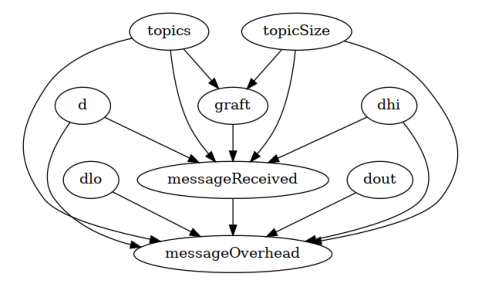

In [110]:
causal_graph = nx.read_adjlist("../1_Discovery/MessageOverhead/AdjLists/pcStable5s.adjlist", create_using=nx.DiGraph)
causal_graph.remove_node('prune')

G=gcm.util.plot(causal_graph, figure_size=[6, 8])

In [111]:
causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, training_data)
gcm.fit(causal_model, training_data)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]      


## TopicSize vc number of topics

In [112]:
topicSizeIntervention = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18.19,20,21,22,23,24]
topicsIntervention = [1,2,8,12,16,22,24]
#add topics 


causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, training_data)
gcm.fit(causal_model, training_data)

simulatedTopics = pd.DataFrame()
simulated = pd.DataFrame()

# dataset = training_data

for i in topicSizeIntervention:
    samples = gcm.interventional_samples(causal_model,
                                     {'topicSize': lambda x: i},
                                     num_samples_to_draw=1000)
    # samples = pd.concat([training_data,samples])
    
    causal_model2 = gcm.StructuralCausalModel(causal_graph)
    gcm.auto.assign_causal_mechanisms(causal_model2, samples)
    gcm.fit(causal_model2, samples)
    
    for j in topicsIntervention:
        samplesTopics = gcm.interventional_samples(causal_model2,
                                     {'topics': lambda x: j},
                                     num_samples_to_draw=1000)
        simulatedTopics = pd.concat([simulatedTopics, samplesTopics])
    
    simulated =  pd.concat([simulated, simulatedTopics])

simulated = simulated.reset_index()

interventions1 = simulated.loc[(simulated['messageOverhead'] > 0) &  (simulated['messageReceived'] > 0) & (simulated['graft'] > 0) ]
interventions = interventions1.loc[(interventions1['d'] == 8) & (interventions1['dlo'] == 6) & (interventions1['dhi'] == 12) & (interventions1['dout'] == 2)]
intervention = interventions.groupby(['d', 'dlo','dhi','dout','topics', 'topicSize']).mean()

intervention = intervention.reset_index()

intervention.head(500)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:00<00:00, 25.66it/s]      


,d,dlo,dhi,dout,topics,topicSize,index,graft,messageReceived,messageOverhead
0,8,6,12,2,1,1.00,842.000000,2.000000,9.000000,156.000000
1,8,6,12,2,1,2.00,252.500000,1.250000,35.000000,294.000000
2,8,6,12,2,1,3.00,342.000000,1.000000,44.000000,317.000000
3,8,6,12,2,1,4.00,661.500000,1.000000,46.500000,308.000000
4,8,6,12,2,1,7.00,925.000000,1.000000,41.000000,272.000000
5,8,6,12,2,1,8.00,654.500000,1.500000,40.500000,278.500000
6,8,6,12,2,1,9.00,340.000000,1.000000,46.500000,354.500000
7,8,6,12,2,1,10.00,537.000000,1.000000,37.500000,284.000000
8,8,6,12,2,1,11.00,22.000000,2.000000,24.000000,156.000000
9,8,6,12,2,1,13.00,435.000000,1.000000,46.000000,343.000000


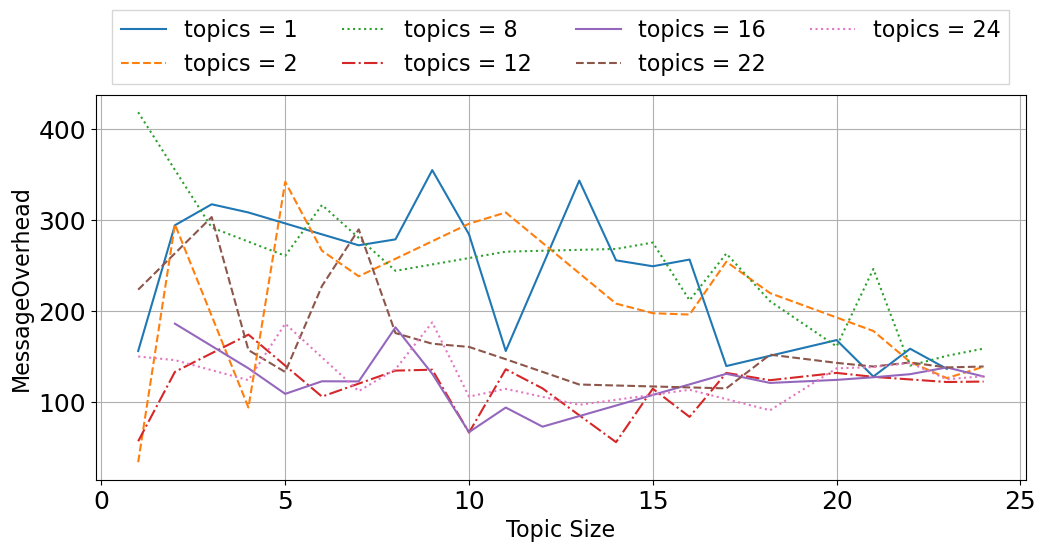

In [113]:
fig, ax = plt.subplots(figsize=(12, 5))

plt.style.use('default')

linetypes = ['solid', 'dashed', 'dotted', 'dashdot', 'solid', 'dashed', 'dotted', 'dashdot','solid', 'dashed', 'dotted', 'dashdot' ]

line = 0
for x in topicsIntervention:
    plotter = intervention.loc[intervention['topics'] == x]
    ax.plot(plotter['topicSize'], plotter['messageOverhead'], label="topics = "+str(x), linestyle=linetypes[line])
    line += 1
    
# ax2.bar(simulated['topicSize'], simulated['topics'], color ='pink', width = 0.4, alpha=0.5)
ax.set(xlabel='Topic Size', ylabel='MessageOverhead')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rcParams.update({'font.size': 16})


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=4, fancybox=False, shadow=False)

# ax.set_ylim(0, 25)
# ax.legend(loc='upper left', ncols=2)
ax.grid()

fig.savefig("./figures/topicSizeIntervention.png")
fig.savefig('./figures/topicSizeIntervention.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight', dpi=600)
plt.show()



In [114]:
#Causal strenght
causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, interventions1)
gcm.fit(causal_model, interventions1)


Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:14<00:00,  1.56s/it]      


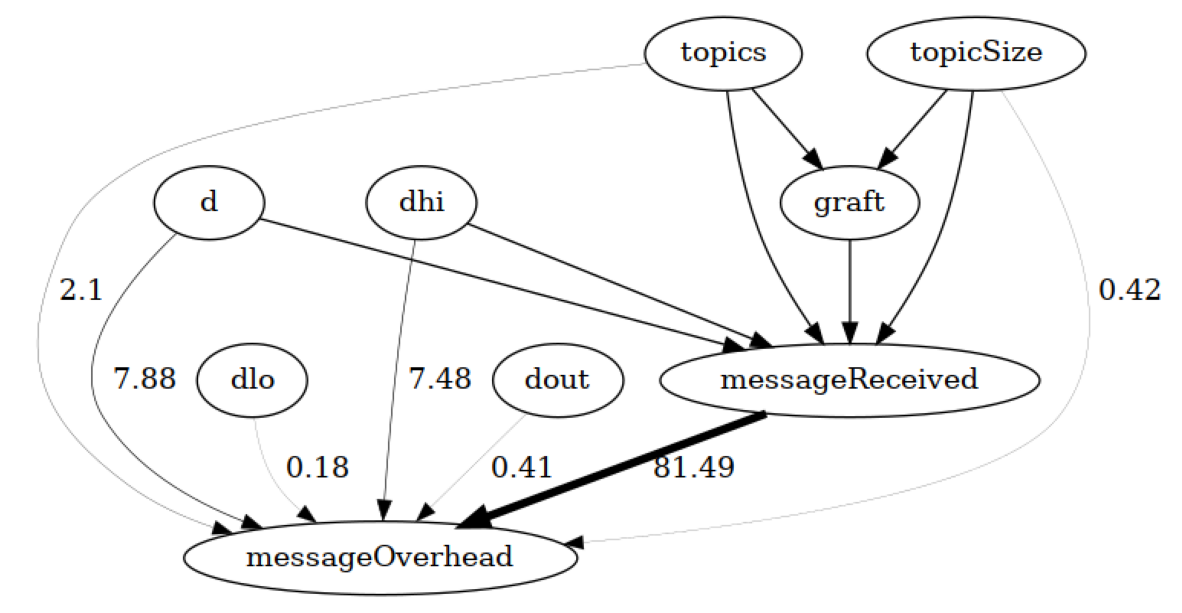

In [115]:
#Key factors influencing Bandwidth?

def convert_to_percentage(value_dictionary):
    total_absolute_sum = np.sum([abs(v) for v in value_dictionary.values()])
    return {k: abs(v) / total_absolute_sum * 100 for k, v in value_dictionary.items()}


arrow_strengths = gcm.arrow_strength(causal_model, target_node='messageOverhead')


fig, ax = plt.subplots(figsize=(15,20))
gcm.util.plot(causal_graph, causal_strengths=convert_to_percentage(arrow_strengths), filename='./figures/strenght_messageOverhead_topicSize.png')#, figure_size=[15, 10])

## D
Selected topics = 8 topicSize = 16

In [116]:
values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
# dout = [2,8,16,24]

simulated = pd.DataFrame()

causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, training_data)
gcm.fit(causal_model, training_data)

samples = gcm.interventional_samples(causal_model,
                                     {'topicSize': lambda x: 16},
                                     num_samples_to_draw=1000)
causal_model2 = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model2, samples)
gcm.fit(causal_model2, samples)
                    
samples2 = gcm.interventional_samples(causal_model2,
                                     {'topics': lambda x: 8},
                                     num_samples_to_draw=1000)
causal_model3 = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model3, samples2)
gcm.fit(causal_model3, samples2)

for d in values:
    samples3 = gcm.interventional_samples(causal_model3,
                                     {'d': lambda x: d},
                                     num_samples_to_draw=1000)
    simulated =  pd.concat([simulated, samples3])

simulated = simulated.reset_index()

interventions3 = simulated.loc[(simulated['messageOverhead'] > 0) &  (simulated['messageReceived'] > 0) & (simulated['graft'] > 0) ]
# interventions2 = interventions2.loc[(interventions2['dlo'] == (interventions2['d']-4)) & (interventions2['dhi'] == (interventions2['d']+4)) & (interventions2['dout'] == 2)]
intervention2 = interventions3.drop(columns=['dhi', 'dlo', 'dout']).groupby(['d','topics', 'topicSize']).mean()


intervention2 = intervention2.reset_index()

intervention2.head(500)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:00<00:00, 31.90it/s]      


,d,topics,topicSize,index,graft,messageReceived,messageOverhead
0,1,8,16,498.243776,2.245851,79.773859,343.262448
1,2,8,16,500.491736,2.193182,79.366736,341.732438
2,3,8,16,495.026015,2.206035,80.430801,341.368366
3,4,8,16,499.551867,2.223029,79.599585,333.587137
4,5,8,16,499.441692,2.186791,80.632611,427.958720
5,6,8,16,500.754167,2.215625,67.732292,380.702083
6,7,8,16,501.362971,2.208159,67.018828,418.198745
7,8,8,16,502.839362,2.193617,63.518085,439.140426
8,9,8,16,499.668763,2.214885,66.486373,461.963312
9,10,8,16,498.388309,2.199374,57.239040,390.358038


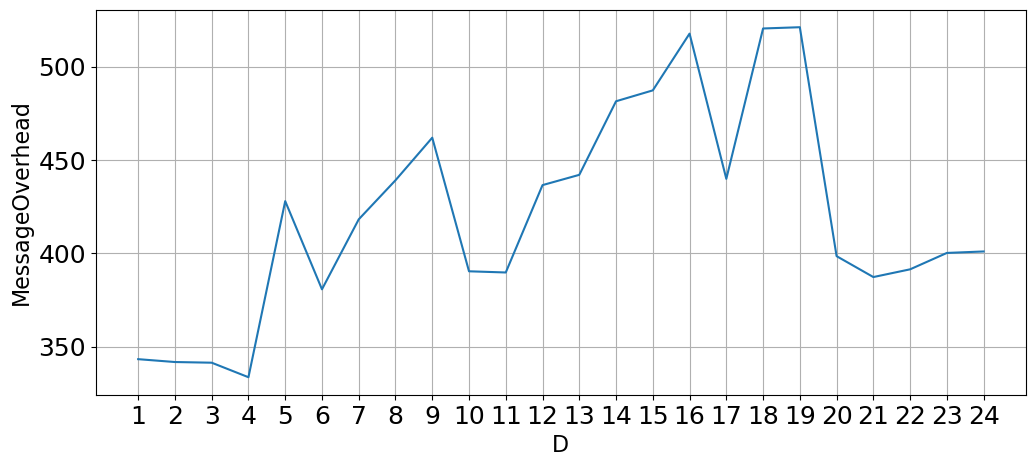

In [117]:
fig, ax = plt.subplots(figsize=(12, 5))

# for x in topicsIntervention:
#     plotter = intervention.loc[intervention['topics'] == x]
ax.plot(intervention2['d'], intervention2['messageOverhead'])

# ax2.bar(simulated['topicSize'], simulated['topics'], color ='pink', width = 0.4, alpha=0.5)
ax.set(xlabel='D', ylabel='MessageOverhead')


plt.xticks(ticks=values, labels=values,fontsize=18)
# plt.xticks(x, labels, rotation ='vertical') 

plt.yticks(fontsize=18)
plt.rcParams.update({'font.size': 16})

# ax.set_ylim(0, 25)
# ax.legend(loc='upper right', ncols=2)
ax.grid()

fig.savefig("./figures/dIntervention.png")
fig.savefig('./figures/dIntervention.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight', dpi=600)
plt.show()



In [118]:
#Causal strenght
causal_model = gcm.StructuralCausalModel(causal_graph)
gcm.auto.assign_causal_mechanisms(causal_model, interventions3)
gcm.fit(causal_model, interventions3)


Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:00<00:00, 21.83it/s]      


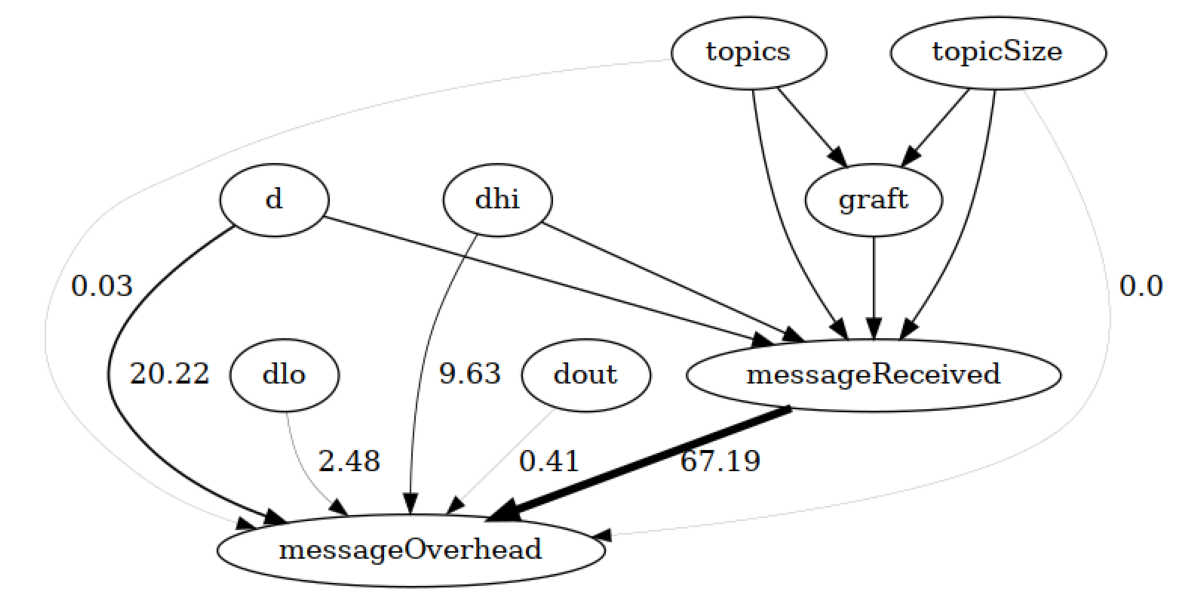

In [119]:

def convert_to_percentage(value_dictionary):
    total_absolute_sum = np.sum([abs(v) for v in value_dictionary.values()])
    return {k: abs(v) / total_absolute_sum * 100 for k, v in value_dictionary.items()}


arrow_strengths = gcm.arrow_strength(causal_model, target_node='messageOverhead')


fig, ax = plt.subplots(figsize=(15,20))
gcm.util.plot(causal_graph, causal_strengths=convert_to_percentage(arrow_strengths), filename='./figures/strenght_messageOverhead_d.png')#, figure_size=[15, 10])

In [ ]:
# Make the causal strenght analysis in the simulated dataset
#plot figure 9 for all combinations of infrastructure of topics. MessageOverhead vs D for each topic structure and the simulated 
# make D interventions for each topic structure